#Introduction
Name : Rahardiansyah Fatoni

Batch : RMT-027

Objective : To create an ANN machine learning model to determine whether someone will cancel their hotel booking or not.

---
#1 - Data Loading and Exploration
- Load Libraries and Dependencies
- Load Dataset
- Understand the Data (head(), info(), describe())
- Check for Missing Values
- Visualize Data (matplotlib, seaborn)

##1.1 - Load Libraries and Dependencies:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# Model Definition and Training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

# Model Evaluation
from sklearn.metrics import classification_report

# Model Saving
import pickle

##1.2 - Load Dataset:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rahardianfatoni/LC/main/hotel.csv')

##1.3 - Understand the Data

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,36265,36266,36267,36268,36269,36270,36271,36272,36273,36274
Booking_ID,ID00001,ID00002,ID00003,ID00004,ID00005,ID00006,ID00007,ID00008,ID00009,ID00010,...,ID36266,ID36267,ID36268,ID36269,ID36270,ID36271,ID36272,ID36273,ID36274,ID36275
no_of_adults,2,2,1,2,2,2,2,2,3,2,...,2,2,2,1,2,3,2,2,2,2
no_of_children,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1,0,1,1,0,0,...,1,2,1,0,0,2,1,2,0,1
no_of_week_nights,2,3,1,2,1,2,3,3,4,5,...,3,2,0,3,1,6,3,6,3,2
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected,Meal Plan 2,Meal Plan 1,Meal Plan 1,Meal Plan 1,Meal Plan 1,...,Meal Plan 1,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Meal Plan 1,Meal Plan 1,Meal Plan 1,Not Selected,Meal Plan 1
required_car_parking_space,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 4,Room_Type 1,Room_Type 4,...,Room_Type 1,Room_Type 2,Room_Type 1,Room_Type 1,Room_Type 6,Room_Type 4,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48,346,34,83,121,44,...,15,8,49,166,0,85,228,148,63,207
arrival_year,2017,2018,2018,2018,2018,2018,2017,2018,2018,2018,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018


In [4]:
# Display basic information about the dataset (columns, data types, non-null counts)
print(df.info())

# Display summary statistics of numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

$Insight:$
- There are 36275 entries with 19 columns, we will drop `Booking_ID` as it is useless for analysis.
- There seems to be no detectable null values in the dataset.

In [5]:
df = df.drop('Booking_ID', axis=1)

##1.4 - Check for Missing Values

In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values and their respective counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


##1.5 - Visualize the Data

###1.5.1 - Numerical Features

We will visualize the data to understand whether the feature is a nominal, categorical, or ordinal values.

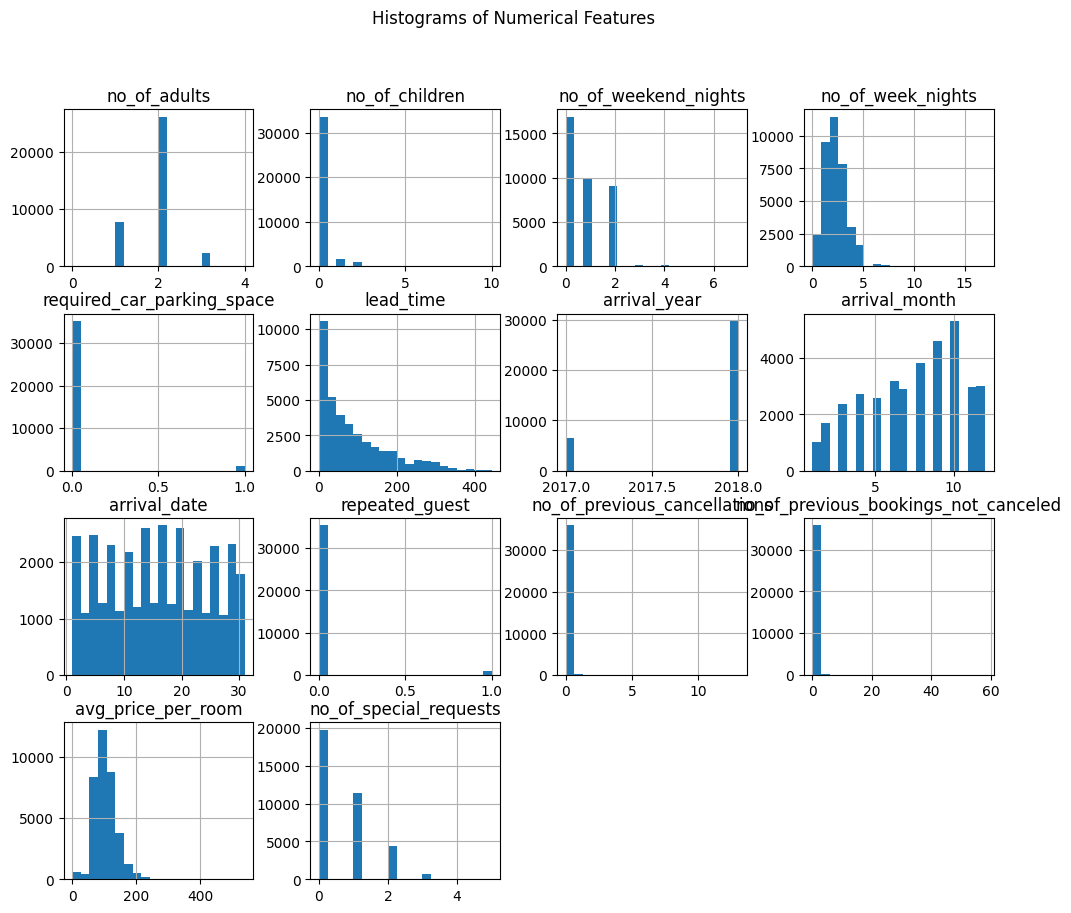

In [7]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
# Visualize the distribution of numerical features (histograms)
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

$Insight:$
- Based on the visualization, we can see that `required_car_parking_space` and `repeated_guest` is a binary categorical feature, and will therefore be One Hot Encoded later.
- From here we can see many features seems to have quite a few imbalance features, such as: `required_car_parking_space`, `repeated_guest`, `no_of_previous_cancellation`, and `no_of_previous_bookings_not_cancelled`.

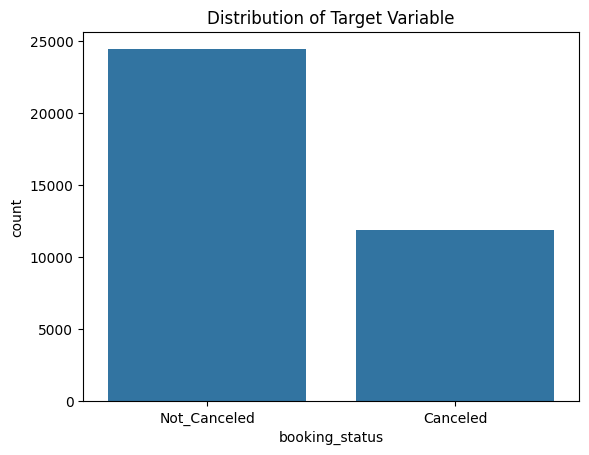

In [8]:
_# Display the distribution of the target variable (for example, 'y')
sns.countplot(x='booking_status', data=df)
plt.title('Distribution of Target Variable')
plt.show()

$Insight:$
- It seems that the distribution of our target variable is fairly balanced with a ratio of 2:1.

In [9]:
# Calculate skewness for each column
skewness = df.skew()

# Display skewness values
print("Skewness for each column:")
print(skewness)

Skewness for each column:
no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
required_car_parking_space               5.413643
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
dtype: float64


<ipython-input-9-b0bc8009c479>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


$Insight:$
- As we have previously witnessed, a lot of features have an imbalance values, imbalanced features tend to have a higher skew.
- All features besides `arrival_date` and `arrival_month` seems to have a skew.

###1.5.2 - Categorical Features

Now let's visualize the features that have an `object` data types, these will later be OneHot Encoded.

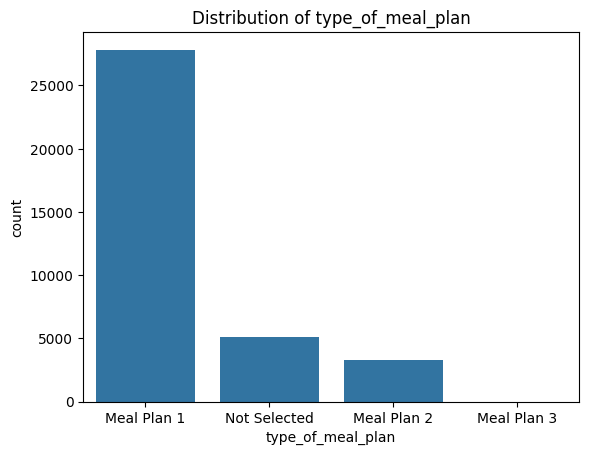

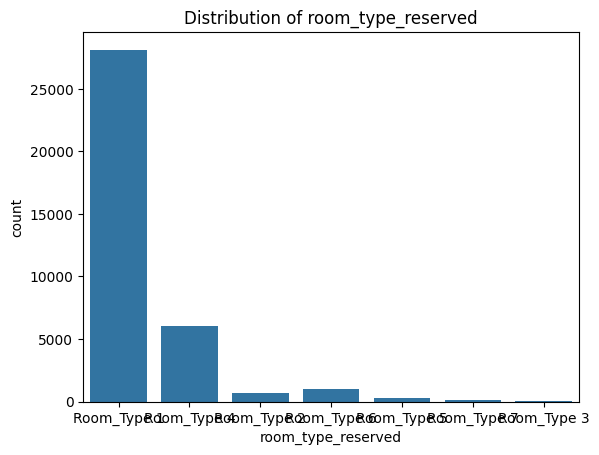

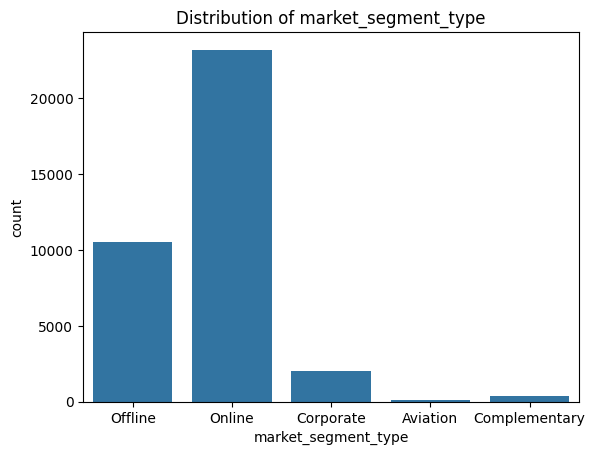

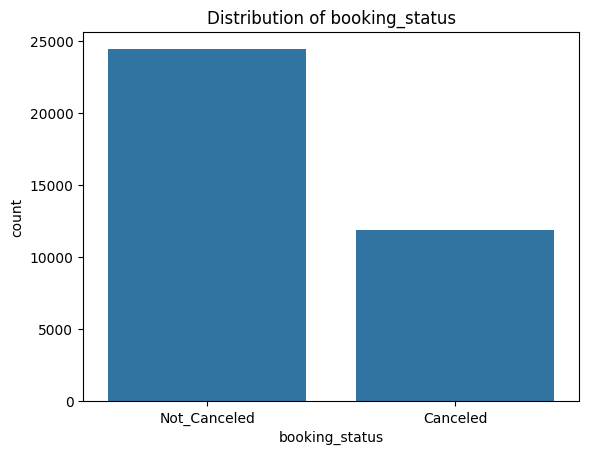

In [10]:
# Visualize categorical features (count plots)
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [11]:
print(df[categorical_columns].value_counts)

<bound method DataFrame.value_counts of       type_of_meal_plan room_type_reserved market_segment_type booking_status
0           Meal Plan 1        Room_Type 1             Offline   Not_Canceled
1          Not Selected        Room_Type 1              Online   Not_Canceled
2           Meal Plan 1        Room_Type 1              Online       Canceled
3           Meal Plan 1        Room_Type 1              Online       Canceled
4          Not Selected        Room_Type 1              Online       Canceled
...                 ...                ...                 ...            ...
36270       Meal Plan 1        Room_Type 4              Online   Not_Canceled
36271       Meal Plan 1        Room_Type 1              Online       Canceled
36272       Meal Plan 1        Room_Type 1              Online   Not_Canceled
36273      Not Selected        Room_Type 1              Online       Canceled
36274       Meal Plan 1        Room_Type 1             Offline   Not_Canceled

[36275 rows x 4 columns

$Insight:$
- Just like our numerical features, the categorical features also seems to mostly have imbalance spread.

---
#2 - Feature Engineering

First let us correctly classify the types of features we have.

In [12]:
numerical_columns = list(numerical_columns.drop(['required_car_parking_space', 'repeated_guest']))

In [13]:
numerical_columns

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [14]:
categorical_columns = list(categorical_columns)

In [15]:
categorical_columns.append('required_car_parking_space')
categorical_columns.append('repeated_guest')
categorical_columns.remove('booking_status')

In [16]:
categorical_columns

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'required_car_parking_space',
 'repeated_guest']

In [17]:
df['booking_status'].replace({'Not_Canceled': 0}, inplace=True)
df['booking_status'].replace({'Canceled': 1}, inplace=True)

Now let us create the pipeline to preprocess our features.

###2.1 - Split into X and Y

In [18]:
# Assuming 'target_variable' is the name of your target variable
X = df.drop('booking_status', axis=1)  # Features
y = df['booking_status']  # Target variable

###2.2 - Split Data into Training and Testing Sets

In [19]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (26208, 17)
Val Size   :  (4625, 17)
Test Size  :  (5442, 17)


In [20]:
y_train.value_counts()

0    17688
1     8520
Name: booking_status, dtype: int64

##2.3 - Feature Selection

Using RandomForestClassifier, we could find the feature importance scores of our numerical features.

In [21]:
# Using feature importance from a Random Forest model
model_for_feature_importance = RandomForestClassifier(random_state=42)
model_for_feature_importance.fit(X_train[numerical_columns], y_train)

RandomForestClassifier(random_state=42)

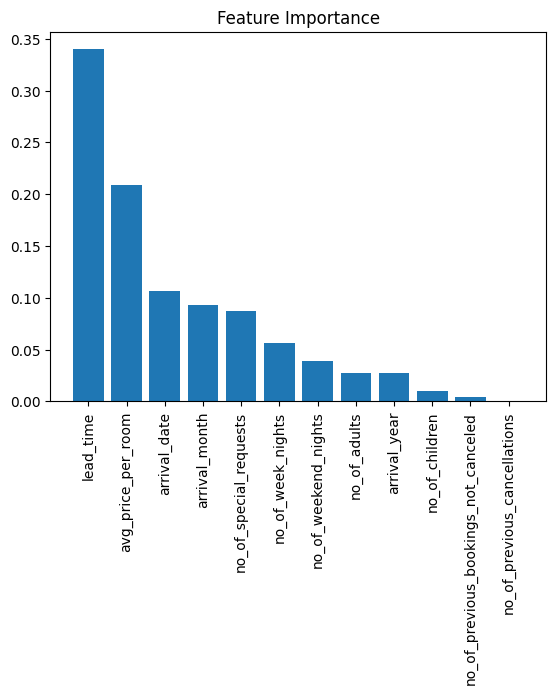

In [22]:
# Display feature importance scores
feature_importance_scores = model_for_feature_importance.feature_importances_
indices = np.argsort(feature_importance_scores)[::-1]

plt.bar(range(X_train[numerical_columns].shape[1]), feature_importance_scores[indices], align='center')
plt.xticks(range(X_train[numerical_columns].shape[1]), X_train[numerical_columns].columns[indices], rotation=90)
plt.title('Feature Importance')
plt.show()

$Insight:$
- It seems there are features with low importance score such as `no_of_previous_cancellations`, `no_of_previous_bookings_not_cancelled`, and `no_of_children`.
- Therefore, it would be best to remove these features to avoid overfitting.

In [23]:
numerical_columns

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [24]:
numerical_columns.remove('no_of_children')
numerical_columns.remove('no_of_previous_cancellations')
numerical_columns.remove('no_of_previous_bookings_not_canceled')

In [25]:
X_train = X_train.drop('no_of_children',axis=1)
X_val = X_val.drop('no_of_children',axis=1)
X_test = X_test.drop('no_of_children',axis=1)

X_train = X_train.drop('no_of_previous_cancellations',axis=1)
X_val = X_val.drop('no_of_previous_cancellations',axis=1)
X_test = X_test.drop('no_of_previous_cancellations',axis=1)

X_train = X_train.drop('no_of_previous_bookings_not_canceled',axis=1)
X_val = X_val.drop('no_of_previous_bookings_not_canceled',axis=1)
X_test = X_test.drop('no_of_previous_bookings_not_canceled',axis=1)

##2.4 - Preprocessing Pipeline

In [26]:
scaler_pipeline = make_pipeline(RobustScaler())
onehot_pipeline = make_pipeline(OneHotEncoder())

preprocessing_pipeline = ColumnTransformer([
    ('scaler_pipe', scaler_pipeline, numerical_columns),
    ('onehot_pipe', onehot_pipeline, categorical_columns)
],
remainder = "passthrough"
)

In [27]:
preprocessing_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler_pipe',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['no_of_adults', 'no_of_weekend_nights',
                                  'no_of_week_nights', 'lead_time',
                                  'arrival_year', 'arrival_month',
                                  'arrival_date', 'avg_price_per_room',
                                  'no_of_special_requests']),
                                ('onehot_pipe',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['type_of_meal_plan', 'room_type_reserved',
                                  'market_segment_type',
                                  'required_car_parking_space',
                                  'repeated_guest'])])

In [28]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_val_preprocessed = preprocessing_pipeline.transform(X_val)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

In [29]:
X_train_preprocessed.shape

(26208, 29)

---
#3 - Sequential API

## 3.1 - Model Definition

In [30]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [35]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(32,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(29,)))
model_sequential.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                960       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1633 (6.38 KB)
Trainable params: 1633 (6.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


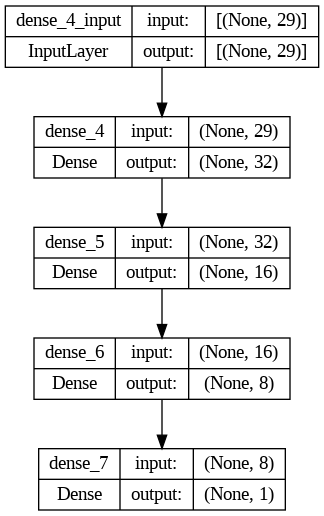

In [36]:
# Plot layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

##3.2 - Model Training

In [37]:
# Train the model

%%time
history_seq = model_sequential.fit(X_train_preprocessed,
                                   y_train,
                                   epochs=20,
                                   validation_data=(X_val_preprocessed, y_val),
                                   batch_size=32)

Epoch 1/20
819/819 [==============================] - 5s 4ms/step - loss: 0.4537 - accuracy: 0.7895 - val_loss: 0.4024 - val_accuracy: 0.8151
Epoch 2/20
819/819 [==============================] - 3s 4ms/step - loss: 0.3970 - accuracy: 0.8193 - val_loss: 0.3885 - val_accuracy: 0.8277
Epoch 3/20
819/819 [==============================] - 4s 5ms/step - loss: 0.3833 - accuracy: 0.8282 - val_loss: 0.3790 - val_accuracy: 0.8285
Epoch 4/20
819/819 [==============================] - 4s 5ms/step - loss: 0.3726 - accuracy: 0.8361 - val_loss: 0.3715 - val_accuracy: 0.8348
Epoch 5/20
819/819 [==============================] - 3s 4ms/step - loss: 0.3637 - accuracy: 0.8394 - val_loss: 0.3620 - val_accuracy: 0.8383
Epoch 6/20
819/819 [==============================] - 3s 4ms/step - loss: 0.3551 - accuracy: 0.8422 - val_loss: 0.3555 - val_accuracy: 0.8411
Epoch 7/20
819/819 [==============================] - 3s 4ms/step - loss: 0.3481 - accuracy: 0.8466 - val_loss: 0.3496 - val_accuracy: 0.8439
Epoch 

##3.3 - Model Evaluation

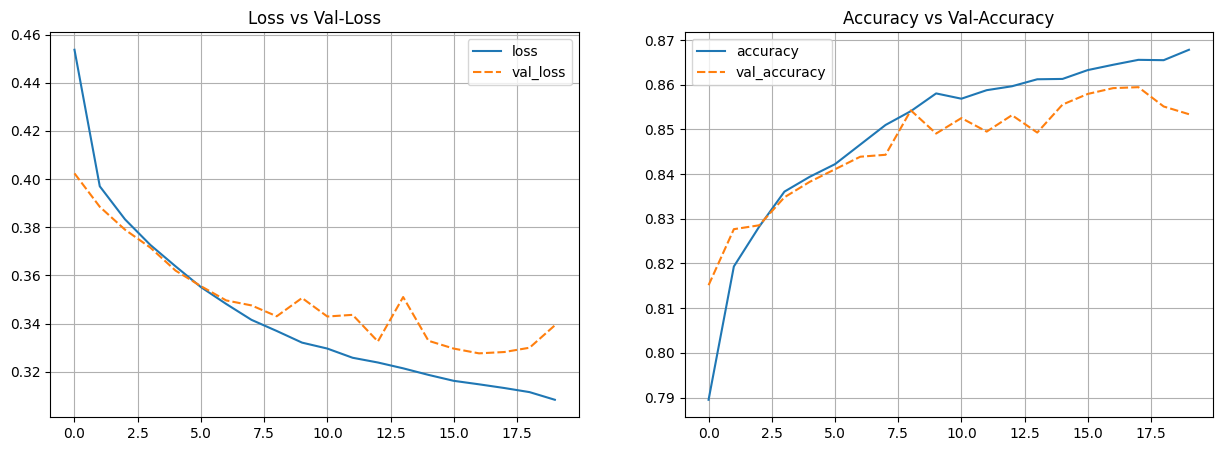

In [38]:
# Plot training results

history_seq_df = pd.DataFrame(history_seq.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [39]:
# Model Evaluation (Test-Set)

y_pred_seq = model_sequential(X_test_preprocessed)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3598
           1       0.79      0.77      0.78      1844

    accuracy                           0.86      5442
   macro avg       0.84      0.84      0.84      5442
weighted avg       0.85      0.86      0.85      5442



$Insight:$
- It seems despite having a high accuracy score, based on the visualization the model is still overfitting.

---
#4 - Functional API

##4.1 - Model Definition

In [40]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [43]:
# Create functional model

input_layer = Input(shape=(29,))
hidden_layer_1 = Dense(29, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)) (input_layer)
hidden_layer_2 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)) (hidden_layer_1)
hidden_layer_3 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)) (hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)) (concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_functional.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 29)]                 0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 29)                   870       ['input_3[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 16)                   480       ['dense_8[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 8)                    136       ['dense_9[0][0]']             
                                                                                            

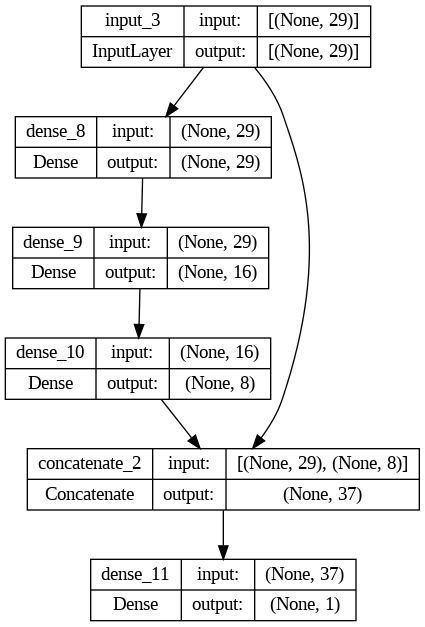

In [44]:
# Plot layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

##4.2 - Model Training

In [45]:
# Train the model

%%time

history_func = model_functional.fit(X_train_preprocessed,
                                    y_train,
                                    epochs=20,
                                    validation_data=(X_val_preprocessed, y_val),
                                    batch_size=32)

Epoch 1/20
819/819 [==============================] - 4s 4ms/step - loss: 0.4514 - accuracy: 0.7887 - val_loss: 0.4031 - val_accuracy: 0.8195
Epoch 2/20
819/819 [==============================] - 4s 4ms/step - loss: 0.3969 - accuracy: 0.8219 - val_loss: 0.3903 - val_accuracy: 0.8266
Epoch 3/20
819/819 [==============================] - 3s 4ms/step - loss: 0.3837 - accuracy: 0.8291 - val_loss: 0.3822 - val_accuracy: 0.8277
Epoch 4/20
819/819 [==============================] - 3s 4ms/step - loss: 0.3745 - accuracy: 0.8320 - val_loss: 0.3753 - val_accuracy: 0.8326
Epoch 5/20
819/819 [==============================] - 3s 4ms/step - loss: 0.3678 - accuracy: 0.8363 - val_loss: 0.3698 - val_accuracy: 0.8337
Epoch 6/20
819/819 [==============================] - 4s 5ms/step - loss: 0.3614 - accuracy: 0.8404 - val_loss: 0.3673 - val_accuracy: 0.8316
Epoch 7/20
819/819 [==============================] - 3s 4ms/step - loss: 0.3556 - accuracy: 0.8439 - val_loss: 0.3603 - val_accuracy: 0.8394
Epoch 

##4.3 - Model Evaluation

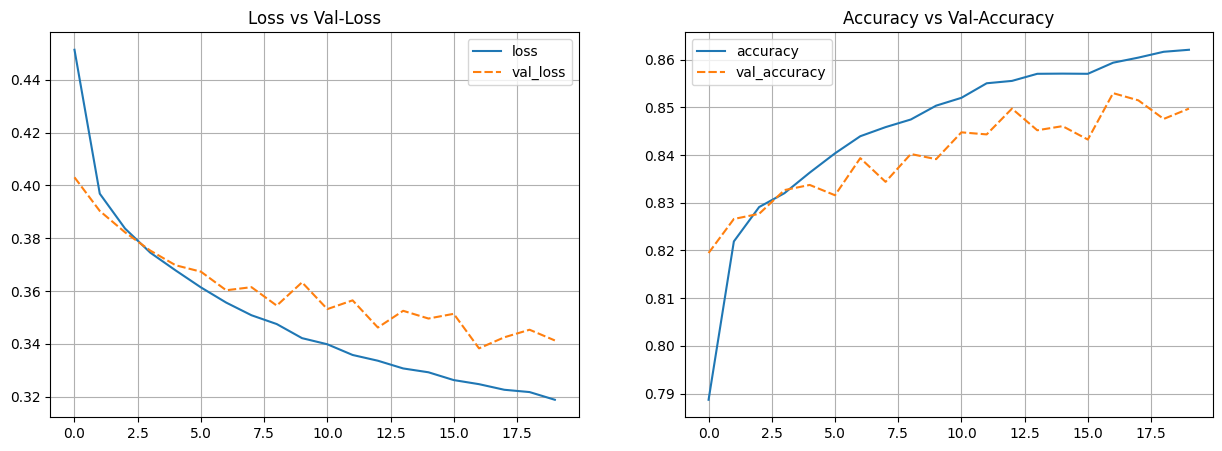

In [46]:
# Plot training results

history_func_df = pd.DataFrame(history_func.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_func_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_func_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [47]:
# Predict Test-Set

y_pred_func = model_functional.predict(X_test_preprocessed)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

171/171 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3598
           1       0.79      0.76      0.78      1844

    accuracy                           0.85      5442
   macro avg       0.84      0.83      0.83      5442
weighted avg       0.85      0.85      0.85      5442



$Insight:$
- It seems despite having a high accuracy score, based on the visualization the model is still overfitting.

---
#5 - Model Inference

In [48]:
# Create a new data

data_inf = {
    'no_of_adults': 2,
    'no_of_children': 1,
    'no_of_weekend_nights': 2,
    'no_of_week_nights': 0,
    'type_of_meal_plan': 'Not Selected',
    'required_car_parking_space': 1,
    'room_type_reserved': 'Room_Type 1',
    'lead_time': 15	,
    'arrival_year': 2017,
    'arrival_month': 11,
    'arrival_date': 26,
    'market_segment_type': 'Offline',
    'repeated_guest': 1,
    'no_of_previous_cancellations': 0,
    'no_of_previous_bookings_not_canceled': 1,
    'avg_price_per_room': 106.68,
    'no_of_special_requests': 3
}

data_inf = pd.DataFrame([data_inf])
data_inf

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,0,Not Selected,1,Room_Type 1,15,2017,11,26,Offline,1,0,1,106.68,3


In [49]:
# Predict using ANN

data_inf_preprocessed = preprocessing_pipeline.transform(data_inf)
y_pred_inf = model_sequential.predict(data_inf_preprocessed)
y_pred_inf

1/1 [==============================] - 0s 57ms/step


array([[1.2579488e-08]], dtype=float32)

In [50]:
# Convert target
# If prediction is more than 0.5, it will be predicted as 1 (Cancelled)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
if y_pred_inf == np.array([[0]]):
  print("This booking is predicted to not be cancelled")
else:
  print("This booking is predicted to be cancelled")

This booking is predicted to not be cancelled


---
#6 - Model Saving

Since the result of the sequential and functional API are similar, we will choose the sequential API to save.

In [51]:
# Save Pipeline

with open('preprocessing_gc7.pkl', 'wb') as file_1:
  pickle.dump(preprocessing_pipeline, file_1)

In [52]:
# Model summary

model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                960       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1633 (6.38 KB)
Trainable params: 1633 (6.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# Freeze model

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                960       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1633 (6.38 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1633 (6.38 KB)
_________________________________________________________________


In [54]:
# Save ANN model

model_sequential.save('gc7_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#7 - Conclusion

In [55]:
print("Classification report (Sequential API): ")
print(classification_report(y_test, y_pred_seq))
print("_______________________________________________")
print("Classification report (Functional API): ")
print(classification_report(y_test, y_pred_func))

Classification report (Sequential API): 
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3598
           1       0.79      0.77      0.78      1844

    accuracy                           0.86      5442
   macro avg       0.84      0.84      0.84      5442
weighted avg       0.85      0.86      0.85      5442

_______________________________________________
Classification report (Functional API): 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3598
           1       0.79      0.76      0.78      1844

    accuracy                           0.85      5442
   macro avg       0.84      0.83      0.83      5442
weighted avg       0.85      0.85      0.85      5442



$Insight:$
- Based on the classification reports, we got similar metric score results, therefore no concrete evidence can be used to prove which model is better.

Strength:
- The models have a sufficiently high f1-score and accuracy score, it is also trained relatively quickly at around 1 minute 30 seconds.

Weakness:
- Based on the visualization we can conclude that the model is overfitting, this is due to the fact that the val-accuracy and val-loss stagnated after a certain epoch.
- In future model, we could further improve the model by applying more layers such as normalization or drop layers, we could also do a more in depth feature selection, by using methods such as chi-square or pearson correlation.